**L**

In [1]:
# !pip show fluidsynth

In [2]:
# !pip show tensorflow

In [3]:
# %pip install tensorflow


In [4]:
# !pip show keras

In [5]:
# from google.colab import drive
# drive.mount('/content/dataset')

In [6]:
# !choco install fluidsynth


In [7]:
# !sudo apt install -y fluidsynth
# print("hi")

In [8]:
# %pip install --upgrade pyfluidsynth

In [9]:
# %pip install pretty_midi

In [10]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

In [11]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

In [12]:
# data_dir = pathlib.Path('data/maestro-v2.0.0')
# if not data_dir.exists():
#   tf.keras.utils.get_file(
#       'maestro-v2.0.0-midi.zip',
#       origin='https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip',
#       extract=True,
#       cache_dir='.', cache_subdir='data',
#   )

In [13]:
# filenames = glob.glob(str('*.mid*'))  #this is storing all the file in array
# print('Number of files:', len(filenames))

In [14]:
# import glob

# # Specify the directory path where your MIDI files are located
# directory_path = 'C:/Users/DELL/Downloads/mididataset sad songs/mididataset sad songs'

# # Use the specified directory path with glob.glob to find MIDI files
# filenames = glob.glob(directory_path + '*')

# # Print the number of files found
# print('Number of files:', len(filenames))

# # Print the filenames for verification
# print('Files:', filenames)


In [15]:
import glob
import os

# Specify the directory path where your MIDI files are located
directory_path = r"C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs/"
# Use os.path.join to handle paths with spaces and special characters
pattern = os.path.join(directory_path, '*.mid*')

# Use the specified directory path with glob.glob to find MIDI files
filenames = glob.glob(pattern)

# Print the number of files found
print('Number of files:', len(filenames))

# Print the filenames for verification
print('Files:', filenames)


Number of files: 108
Files: ['C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\\Abhagi Piya Ki Video Song  Kanika Kapoor  Ahmed  Mohammed Hussain  T-Series.mid', 'C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\\Abhagi Piya Ki Video Song  Tera Intezaar  Arbaaz Khan  Sunny Leone  Kanika Kapoor   T-Series.mid', 'C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\\AGAR TUM SAATH HO Full VIDEO song  Tamasha  Ranbir Kapoor, Deepika Padukone  T-Series.mid', 'C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\\Arijit Singh Pachtaoge  Vicky Kaushal, Nora Fatehi Jaani, B Praak, Arvindr Khaira  Bhushan Kumar.mid', 'C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\\ARIJIT SINGH VERSION Bekhayali Full Song  Kabir Singh  Shahid K,Kiara A  Sandeep Reddy V Irshad.mid', 'C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\\Arijit Singh Yeh Is

In [16]:
sample_file = filenames[1]
print(sample_file)

C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\Abhagi Piya Ki Video Song  Tera Intezaar  Arbaaz Khan  Sunny Leone  Kanika Kapoor   T-Series.mid


In [17]:
pmc = pretty_midi.PrettyMIDI(sample_file)

the above library return the synthesized output means it will calculate all the stuff and return the data

In [18]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=60):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [19]:
# %pip uninstall fluidsynth

In [20]:
# display_audio(pmc)

In [21]:
# print('Number of instruments:', len(pmc.instruments))
instrument = pmc.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Instrument name: Acoustic Grand Piano


Imp cell

In [22]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=61, note_name=C#4, duration=0.1522
1: pitch=61, note_name=C#4, duration=0.0435
2: pitch=68, note_name=G#4, duration=0.0978
3: pitch=73, note_name=C#5, duration=0.2391
4: pitch=41, note_name=F2, duration=0.0217
5: pitch=65, note_name=F4, duration=0.0326
6: pitch=103, note_name=G7, duration=0.0326
7: pitch=66, note_name=F#4, duration=0.0109
8: pitch=80, note_name=G#5, duration=0.0326
9: pitch=58, note_name=A#3, duration=0.0217


In [23]:
# from google.colab import auth
# auth.authenticate_user()


# from google.colab import drive
# drive.mount('/content/dataset')

In [24]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)  #the main this pretty midi is doing giving all the data
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

The above function we convert the midi to notes imp

Here the raw notes is the dataset variable name

In [25]:
raw_notes = midi_to_notes(r"C:\Users\mruna\Downloads\dataset\mididataset sad songs\mididataset sad songs/AGAR TUM SAATH HO Full VIDEO song  Tamasha  Ranbir Kapoor, Deepika Padukone  T-Series.mid")  #this sample file was declared before
raw_notes.head()

,pitch,start,end,step,duration
0,47,0.000000,0.086957,0.000000,0.086957
1,66,0.000000,0.293478,0.000000,0.293478
2,47,0.097826,0.358696,0.097826,0.260870
3,66,0.326087,0.467391,0.228261,0.141304
4,47,0.369565,0.804348,0.043478,0.434783


In [26]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['B2', 'F#4', 'B2', 'F#4', 'B2', 'A4', 'A4', 'A#2', 'A4', 'A4'],
      dtype='<U3')

plot_piano_roll function plots graph on base pitch and time in notes

In [27]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(                       # this is mathplot library
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

In [28]:
# plot_piano_roll(raw_notes, count=100)   #this is print the first 100 notes

In [29]:
# plot_piano_roll(raw_notes)    #this will print the notes of whole song

In [30]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

In [31]:
# plot_distributions(raw_notes)

Here we again we are converting notes to midi

In [32]:
# def notes_to_midi(
#   notes: pd.DataFrame,
#   out_file: str,
#   instrument_name: str,
#   velocity: int = 100,  # note loudness
# ) -> pretty_midi.PrettyMIDI:

#   pm = pretty_midi.PrettyMIDI()
#   instrument = pretty_midi.Instrument(
#       program=pretty_midi.instrument_name_to_program(     # again the pretty midi is converting the notes to midi
#           instrument_name))

#   prev_start = 0
#   for i, note in notes.iterrows():
#     start = float(prev_start + note['step'])
#     end = float(start + note['duration'])
#     note = pretty_midi.Note(
#         velocity=velocity,
#         pitch=int(note['pitch']),
#         start=start,
#         end=end,
#     )
#     instrument.notes.append(note)
#     prev_start = start

#   pm.instruments.append(instrument)
#   pm.write(out_file)
#   return pm

In [33]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(     # again the pretty midi is converting the notes to midi
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(note['step'])
    end = float(note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = end

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [34]:
# example_file = 'example.midi'
# example_pm = notes_to_midi(
#     raw_notes, out_file=example_file, instrument_name=instrument_name)

In [35]:
# display_audio(example_pm)

Creating data set 5

In [36]:
num_files = 5
all_notes = []
for f in filenames[:num_files]:
  print(f)
  notes = midi_to_notes(f)         #notes of 5 files
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\Abhagi Piya Ki Video Song  Kanika Kapoor  Ahmed  Mohammed Hussain  T-Series.mid


C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\Abhagi Piya Ki Video Song  Tera Intezaar  Arbaaz Khan  Sunny Leone  Kanika Kapoor   T-Series.mid
C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\AGAR TUM SAATH HO Full VIDEO song  Tamasha  Ranbir Kapoor, Deepika Padukone  T-Series.mid
C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\Arijit Singh Pachtaoge  Vicky Kaushal, Nora Fatehi Jaani, B Praak, Arvindr Khaira  Bhushan Kumar.mid
C:/Users/mruna/Downloads/dataset/mididataset sad songs/mididataset sad songs\ARIJIT SINGH VERSION Bekhayali Full Song  Kabir Singh  Shahid K,Kiara A  Sandeep Reddy V Irshad.mid


In [37]:
len(all_notes)

136550

In [38]:
# import os
# import pandas as pd

# # Assuming filenames is a list containing the MIDI file paths in Colab content
# filenames = [os.path.join('/content', filename) for filename in os.listdir('/content') if filename.endswith('.MID') or filename.endswith('.mid')]

# num_files = 10
# all_notes = []

# for f in filenames[:num_files]:
#     print(f)
#     notes = midi_to_notes(f)
#     all_notes.append(notes)

# all_notes = pd.concat(all_notes)


In [39]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 136550


In [40]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [41]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)  #here it is making notes dataset
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [42]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,3.0,4.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [43]:
seq_length = 20
vocab_size = 256
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(20, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [44]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (20, 3)
sequence elements (first 10): tf.Tensor(
[[0.23828125 0.         0.0326087 ]
 [0.37890625 0.00724638 0.02173913]
 [0.37109375 0.00362319 0.0326087 ]
 [0.38671875 0.01449275 0.01358696]
 [0.2421875  0.01811594 0.01630435]
 [0.390625   0.00362319 0.01358696]
 [0.375      0.00724638 0.0298913 ]
 [0.24609375 0.01086957 0.0923913 ]
 [0.39453125 0.00724638 0.04347826]
 [0.37890625 0.02173913 0.07336957]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=102.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.05434782608695654>}


In [45]:
batch_size = 128
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [46]:
train_ds.element_spec

(TensorSpec(shape=(128, 20, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(128,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(128,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(128,), dtype=tf.float64, name=None)})

A

**Model yaha hai**

In [47]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [48]:
input_shape = (seq_length, 3)
learning_rate = 0.10

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 20, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │     67,584 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ duration (Dense)    │ (None, 1)         │        129 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pitch (Dense)       │ (None, 128)       │     16,512 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step (Dense)        │ (None, 1)         │        129 │ lstm[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 84,354 (329.51 KB)

 Trainable params: 84,354 (329.51 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# import tensorflow as tf

# input_shape = (seq_length, 3)
# learning_rate = 0.10

# inputs = tf.keras.Input(input_shape)
# x = tf.keras.layers.LSTM(128, recurrent_initializer='glorot_uniform')(inputs)

# outputs = {
#     'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
#     'step': tf.keras.layers.Dense(1, name='step')(x),
#     'duration': tf.keras.layers.Dense(1, name='duration')(x),
# }

# model = tf.keras.Model(inputs, outputs)

# loss = {
#     'pitch': tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     'step': mse_with_positive_pressure,
#     'duration': mse_with_positive_pressure,
# }

# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# model.compile(loss=loss, optimizer=optimizer)

# model.summary()


In [50]:
losses = model.evaluate(train_ds, return_dict = True)
losses

1066/1066 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 4.8741


c:\Users\mruna\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


{'loss': 4.869734764099121}

In [51]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 0.5,
        'duration':0.5,
    },
    optimizer=optimizer,
)

In [52]:
model.evaluate(train_ds, return_dict=True)

1066/1066 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.2542


{'loss': 0.2540822923183441}

** training**

In [53]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}.weights.h5',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [55]:
%%time
epochs = 4

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/4
1066/1066 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - loss: 0.9326
Epoch 2/4
 909/1066 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.9318

KeyboardInterrupt: 

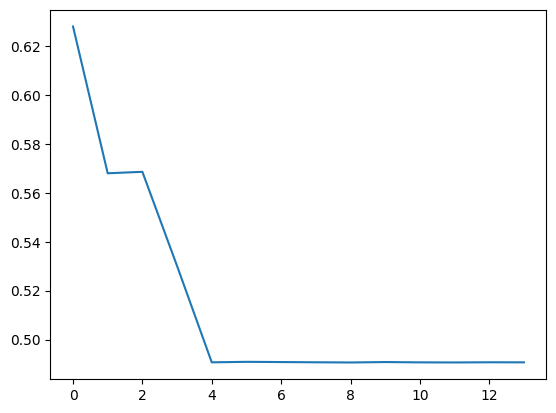

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [ ]:
model.save('./model_midi_20.h5')
print("Trained model saved successfully.")

Trained model saved successfully.


In [ ]:
# model.save('new.keras')

In [ ]:
model.save('./model_midi_20.keras')

In [ ]:
# !pip show tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define the custom loss function
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

# Register the custom loss function with Keras
losses = {'mse_with_positive_pressure': mse_with_positive_pressure}

# Load the model with custom loss function
model = load_model(r"C:\Users\mruna\OneDrive\Desktop\tarangAI\model_midi_20.h5", custom_objects=losses)


In [ ]:
# from tensorflow.keras.models import load_model
# model=load_model("/content/new_model.h5")

In [ ]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']
  print(pitch_logits)
  print(step)
  print(duration)

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)
  duration=float(duration)/10
  step = float(step)/30
  print("----------------------------------------------------------------")
  print(int(pitch))
  print(float(step))
  print(float(duration))
  print("----------------------------------------------------------------")


  return int(pitch), float(step), float(duration)

In [ ]:
# temperature = 10.0
# num_predictions = 10

# sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# # The initial sequence of notes; pitch is normalized similar to training

# # sequences
# input_notes = (
#     [[80,0.12,0.36]])
# print(len(input_notes))
# print('///////////////////////////////////')
# generated_notes_1 = []
# prev_start = 0
# for _ in range(num_predictions):
#   pitch, step, duration = predict_next_note(input_notes, model, temperature)
#   start = prev_start + step
#   end = start + duration
#   input_note = (pitch, step, duration)
#   generated_notes_1.append((*input_note, start, end))
#   input_notes = np.delete(input_notes, 0, axis=0)
#   input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
#   prev_start = end

# generated_notes_1 = pd.DataFrame(
#     generated_notes_1, columns=(*key_order, 'start', 'end'))

In [ ]:
temperature = 100.0
num_predictions = 10

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training

# sequences
# input_notes = (
#     [[80,0.12,0.36]])
# print(len(input_notes))
# raw_notes=raw_notes['pitch','step','duration']
# raw_notes = raw_notes.drop(['start', 'end'], axis=1)

input_notes_df = raw_notes.head(20)
input_notes = input_notes_df.to_numpy()
print(len(input_notes))
print('///////////////////////////////////')
generated_notes_1 = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes_1.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = end

generated_notes_1 = pd.DataFrame(
    generated_notes_1, columns=(*key_order, 'start', 'end'))

20
///////////////////////////////////
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[-12.0903425   -9.519159    -9.917285   -12.518652    -9.867851
   -6.689284   -10.256323    -4.722225    -4.5234127   -4.1549897
  -12.0090885  -11.718814    -6.278387    -4.3961973   -5.5315504
   -2.3852696   -5.694593    -2.1656675   -0.20198387  -4.631318
    4.9205117   -2.1371298   -0.321071     3.583015     3.7238445
    4.592195     5.163697     6.3750067    6.421725     6.134106
    4.1786084    3.6596837    5.2646637    5.263344     6.686768
    5.5530825    4.7969       5.59724      4.07471      4.962364
    4.9125094    2.3146532    3.4499736    4.9958706    4.343634
    4.811408     4.630747     5.74143      5.8752556    2.3026195
    7.2339973    5.340283     5.581896     3.8324366    5.221556
    3.9313173    5.9213734    4.8228445    5.60779      7.48227
    5.615282     5.5395184    5.203112     6.391732     5.8326197
    4.3887887    5.3358283    6.669039     4.4271073    5.86626
    4.3400

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[-12.090342    -9.519158    -9.917284   -12.518651    -9.867851
   -6.689284   -10.256323    -4.7222257   -4.5234127   -4.15499
  -12.0090885  -11.718814    -6.278387    -4.3961973   -5.531551
   -2.3852696   -5.694594    -2.1656675   -0.20198411  -4.631319
    4.9205112   -2.1371298   -0.3210715    3.583015     3.723844
    4.592194     5.1636963    6.375006     6.4217243    6.134106
    4.1786084    3.6596832    5.2646637    5.263344     6.686768
    5.553082     4.7969       5.5972395    4.0747094    4.9623637
    4.9125094    2.3146532    3.4499736    4.99587      4.3436337
    4.8114076    4.6307464    5.74143      5.8752556    2.3026192
    7.2339973    5.340283     5.581896     3.8324363    5.2215557
    3.931317     5.9213734    4.8228445    5.6077895    7.4822693
    5.6152816    5.539518     5.203112     6.391732     5.8326187
    4.388788     5.335828     6.669039     4.427107     5.86626
    4.340021     4.0266733    5.999995     4.031

In [ ]:
generated_notes_1

,pitch,step,duration,start,end
0,28,0.035074,0.206267,0.035074,0.241340
1,84,0.037332,0.204368,0.278672,0.483040
2,118,0.035074,0.206266,0.518114,0.724380
3,125,0.035074,0.206267,0.759454,0.965721
4,30,0.035074,0.206267,1.000794,1.207061
5,114,0.037329,0.204406,1.244390,1.448797
6,100,0.035074,0.206267,1.483870,1.690137
7,36,0.035074,0.206267,1.725211,1.931477
8,111,0.037235,0.204544,1.968713,2.173257
9,113,0.035074,0.206267,2.208330,2.414597


In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(     # again the pretty midi is converting the notes to midi
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(note['start'])
    end = float(note['end'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = end

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [ ]:
# out_file = 'output.mid'
# out_pm1 = notes_to_midi(
#     generated_notes_1, out_file=out_file, instrument_name=instrument_name)
# display_audio(out_pm1)

In [ ]:
# from google.colab import files
# files.download(out_file)

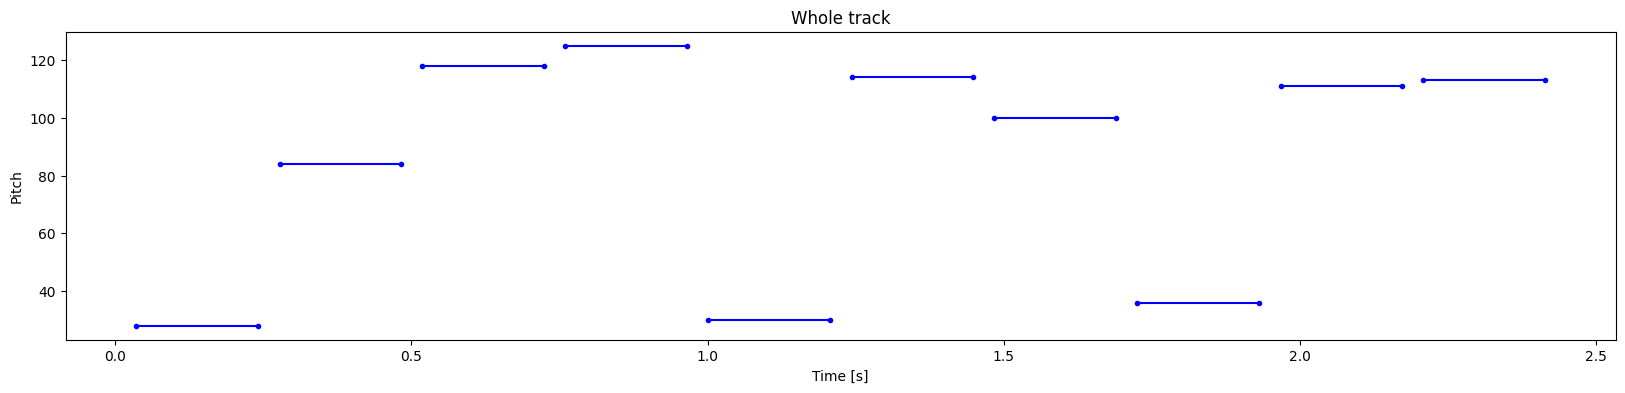

In [ ]:
plot_piano_roll(generated_notes_1)

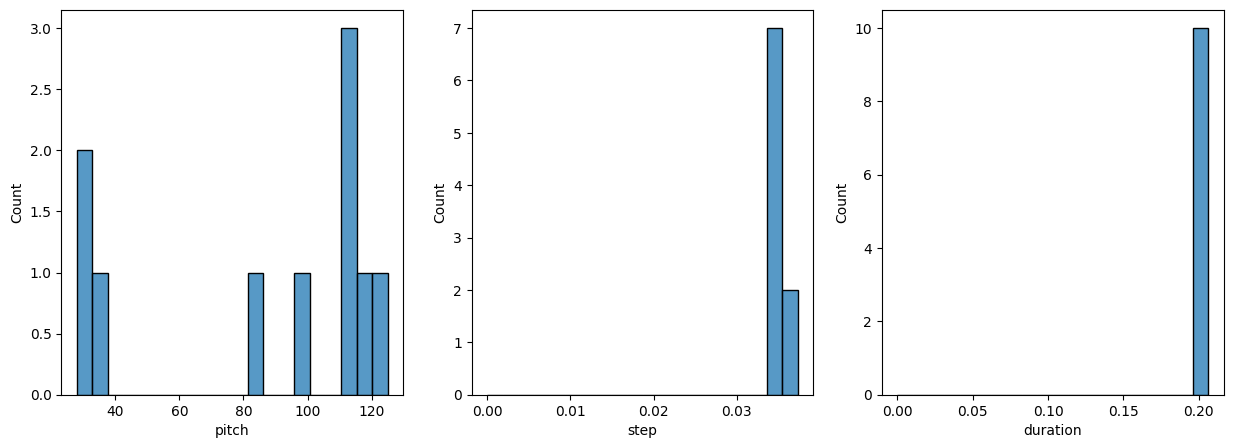

In [ ]:
plot_distributions(generated_notes_1)